# Valorisation d’une obligation

Cheryl Kouadio  
2025-03-23

Une obligation est un titre de créance émis par une entreprise ou une
collectivité publique afin de financer un projet ou de refinancer une
dette. Contrairement aux actions, qui confèrent un droit de propriété,
les obligations sont des instruments de dette qui garantissent aux
investisseurs des paiements périodiques sous forme d’intérêts (coupons)
et le remboursement du capital à une échéance déterminée.

Pour la valoriser, comme pour valoriser n’importe quel produit, nous
devons faire l’espérance de la valeur actualisée des flux futurs sous la
probabilité risque neutre. En effet, cela permet de se mettre sous la
perspective d’un investisseur qui est indifférent au risque et qui ne
demande qu’à être rémunéré pour le temps qu’il prête son argent.

$$
X_{t=0} = \mathbb{E}^Q \left[ e^{-r(T-t)} X_T \right]
$$

La valorisation d’une obligation repose principalement sur deux notions
fondamentales :

-   Le taux d’intérêt : il représente le coût du capital et reflète la
    rémunération exigée par les investisseurs pour prêter leur argent.
    Il peut être perçu comme le “loyer” du capital prêté ou encore comme
    la compensation pour le risque associé à l’investissement. Ce taux
    influence directement la valeur d’une obligation, car une hausse des
    taux entraîne généralement une baisse du prix des obligations
    existantes sur le marché secondaire.
-   Le taux de recouvrement : il correspond au pourcentage du capital
    que les investisseurs peuvent espérer récupérer en cas de défaut de
    l’émetteur. Un taux de recouvrement élevé signifie que, même en cas
    de faillite, les créanciers peuvent récupérer une grande partie de
    leur investissement, tandis qu’un taux faible suggère un risque de
    perte plus important. Historiquement, il est fixé à $R = 40\%$.

Valoriser une obligation revient donc à calculer la valeur actualisée
des flux futurs de paiement. De ce fait, cela revient à valoriser les
coupons, le nominal en cas de non défaut de la part de l’émetteur et le
recouvrement en cas de défaut de l’émetteur.

#### a. Valorisation des coupons

Le coupon est le montant que l’émetteur de l’obligation s’engage à
verser à l’investisseur à intervalles réguliers (généralement annuels ou
semestriels) jusqu’à l’échéance de l’obligation. Il est exprimé en
pourcentage de la valeur nominale de l’obligation et peut être fixe ou
variable, en fonction des modalités de l’émission.

Vu à $t$, la valeur d’un coupon $c$ qui sera payé à $T_i$ est donnée par
: $$
N \mathbb{E}^Q \left[ e^{-r(Ti-t)} c \right],
$$

où $c$ est le coupon, $r$ est le taux d’intérêt sans risque et $T_i$ est
la date de paiement du coupon. Comme le taux d’intérêt est constant, et
le paiement du coupon dépend de la probabilité de survie de l’émetteur,
on peut réécrire la formule précédente comme suit :

$$
N e^{-r(Ti-t)} c \mathbb{P}(\tau > T_i),
$$

où $\mathbb{P}(\tau > T_i)$ est la probabilité de survie de l’émetteur à
la date $T_i$. Le modèle utilisé pour la probabilité de survie est le
modèle à intensité $\lambda$ de Jarrow et Turnbull. La probabilité de
survie est donnée par :

$$
\mathbb{P}(\tau > T_i) = e^{-\int_{t}^{T_i} \lambda(s) ds} = e^{-\lambda \int_{t}^{T_i} ds} = e^{-\lambda (T_i - t)}.
$$

De ce fait, la valorisation du coupon est donnée par :

$$
C_{t} = \sum_{i=1}^{n} N \times c \times e^{-r(T_i-t)} \times e^{-\lambda (T_i - t)} = \sum_{i=1}^{n} N \times c \times e^{-(r + \lambda) \times (T_i-t)} \mathbb{1}_{T_i \geq t}
$$

#### b. Valorisation du nominal

Le nominal est le montant demandé par l’émetteur. Sa valorisation est
donnée par : $$
N_t = N \times e^{-r(T-t)} \times e^{-\lambda (T-t)} \mathbb{1}_{T \geq t}
$$

#### c. Valorisation du recouvrement

Pour valoriser le recouvrement, il est nécessaire de connaitre la
probabilité de défaut à l’instant précis $t$.

$$
\begin{aligned}
\mathbb{P}(\tau = u) &= \mathbb{P}(u \leq \tau \leq u + du) \\
&= \mathbb{P}(\tau \geq u) - \mathbb{P}(\tau \geq u + du)\\
&= - \frac{ \mathbb{P}(\tau \geq u + du) - \mathbb{P}(\tau \geq u) }{du} du\\
&= -\frac{\mathbb{P}(\tau \geq u)}{du}du \\
&= \lambda e^{\lambda (u-t)} du
\end{aligned}
$$

De ce fait, la valorisation du recouvrement à t est : $$
\begin{aligned}
R_t &= \int_t^T N R e^{-rt} \mathbb{P}(\tau = u)  \\
&= \int_t^T N R e^{-rt} \lambda e^{\lambda (u-t)} du \\
&= N \lambda R \times \frac{1 - e^{-(r+\lambda)(T-t)}}{r+\lambda} \mathbb{1}_{T \geq t}
\end{aligned}
$$

En se servant de ces formules, nous pouvons valoriser une obligation de
la manière suivante : \$\$

In [1]:
import numpy as np
def pricing_bond(t,c,T,r,lambda_,R,N,dt=1):
    """
    Fonction qui calcule la valeur d'une obligation.
    t : date actuelle
    c : coupon
    T : date de maturité
    r : taux sans risque
    lambda_ : intensité de défaut
    R : taux de recouvrement
    N : nominal
    """

    ### Valorisation du coupon
    Ct = N * c * np.sum([np.exp(-(r+lambda_) * (Ti - t)) * (Ti>=t) for Ti in range(dt, T+dt,dt)])

    ### Valorisation du nominal
    #Proba de survie
    PS = np.exp( - lambda_ * (T - t))
    Nt = N * np.exp( -r * (T - t)) * PS * (T>=t)

    ### Valorisation du recouvrement
    if (r+lambda_)==0 :
        R_ = T-t
    else :
        R_ = N * lambda_ * R * ( 1 - np.exp( - (r+lambda_) * (T-t)))/(r+lambda_)
    Rt = R_ * (T >= t)

    ### Valorisation de l'obligation
    Bond = Ct + Nt + Rt
    return Bond

## I. Valorisation d’une obligation sans risque de défaut

Nous souhaitons valoriser une obligation sans risque de défaut,
i.e. $\lambda = 0$. Pour ce faire, nous fixons les paramètres suivants
: - $N = 1$ : le nominal de l’obligation - $r = 0.02$ : le taux
d’intérêt sans risque - $\lambda = 0$ : l’intensité de défaut - $T = 10$
: l’échéance de l’obligation - $c = 0.02$ : le coupon annuel - $R = 0.4$
: le taux de recouvrement - $n = 10$ : le nombre de coupons - $t = 0$ :
l’instant présent

In [2]:
t=0
lambda_ = 0
r = 2/100
T = 10
c = 2/100
R = 40/100
N=1

B_t = pricing_bond(t=t,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N)
print(f"Prix de l'obligation vu à t={t} : {B_t}")

Prix de l'obligation vu à t=0 : 0.9981933497987289

En valorisant l’obligation, nous obtenons un prix de $B_0 \approx 0.99$.
Ce prix est proche du nominal, car les taux de coupons sont égaux au
taux de marché. L’obligation est dite au pair (Prix = Nominal) car elle
rémunère au taux de marché. Si $c > r$, le prix de l’obligation sera
supérieur au nominal, car le marché se serait rué sur cette obligation,
car elle offrirait plus que le taux de marché. Sinon, le prix de
l’obligation sera inférieur au nominal, car le marché serait plus
réticent.

> 💡 La condition dans laquelle l’obligation émise vaut 100% du nominal,
> i.e. au pair, est $c \approx r + \lambda$. C’est une obligation qui
> permet de recouvrir ausi bien le risque de taux ($r$) et le risque de
> crédit lié à l’intensité de défaut ($\lambda$). Pour voir ceci, nous
> avons implémenté ci-dessous une fonction qui permet d’extrait le
> coupon qui permet d’avoir une obligation au pair, avec les mêmes
> paramètres que précédemment.

In [3]:
t=0
lambda_ = 1/100
r = 2/100
T = 10
R = 40/100
N=1

# Méthode de dichotomie
from scipy.optimize import bisect

def trouver_coupon(t, T, r, lambda_, R, N, dt=1, tol=1e-6):
    """
    Trouve le coupon c tel que la valeur de l'obligation soit égale à N.
    """
    def equation(c):
        return pricing_bond(t, c, T, r, lambda_, R, N, dt) - N
    
    c_opt = bisect(equation, 0, 1, xtol=tol)  # Recherche de c dans l'intervalle [0,1]
    return c_opt

c_opt = trouver_coupon(t=t, T=T, r=r, lambda_=lambda_, R=R, N=N)
c_opt

print(f"Coupon pour avoir une obligation au pair vu à t={t} : {c_opt:.2%}")
B_t = pricing_bond(t=t,c=c_opt,T=T,r=r,lambda_=lambda_,R=R,N=N)
print(f"Prix de l'obligation vu à t={t} : {B_t}")

Coupon pour avoir une obligation au pair vu à t=0 : 2.64%
Prix de l'obligation vu à t=0 : 1.000007783902349

> De plus, lorsque l’intensité de défaut est très grande, on retrouve un
> prix à peu près égal au taux de recouvrement. En effet, la probabilité
> de défaut est très grande et donc la probabilité qu’il y ait un
> recouvrement est très élevée. (voir exemple ci-dessous)

In [4]:
t=0
lambda_ = 10
r = 2/100
T = 10
c = 2/100
R = 40/100
N=1


B_t = pricing_bond(t=t,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N)
print(f"Prix de l'obligation vu à t={t} : {B_t:.4f}")
print(f"Taux de recouvrement : {R:.4f}")

Prix de l'obligation vu à t=0 : 0.3992
Taux de recouvrement : 0.4000

## II. Evolution du prix de l’obligation en fonction du temps

Durant la vie de l’obligation, son prix évolue en fonction des paiements
de coupons. À chaque distribution de coupon, une chute du prix de
l’obligation est observée. Cette baisse s’explique par le fait que,
juste avant le versement, le prix de l’obligation intègre la valeur du
coupon à percevoir. Une fois le coupon payé aux détenteurs, cette valeur
disparaît, entraînant mécaniquement une diminution du prix de
l’obligation, jusqu’à atteindre le nominal de l’obligation ainsi que le
dernier coupon.

Toutefois, après cette chute liée au détachement du coupon, la valeur de
l’obligation remonte progressivement à mesure que l’échéance du prochain
coupon approche. Ce phénomène crée une évolution en dents de scie, où
chaque baisse correspond à un paiement de coupon et chaque remontée
traduit l’accumulation de la valeur du prochain paiement attendu.

Bien que ce phénomène soit logique et attendu, il peut être perçu
négativement car la forme en dents de scie pourrait donner l’impression
d’une dégradation de la qualité de l’obligation. C’est pourquoi on
distingue deux types de prix :

-   Le dirty price (prix sale) : il correspond au prix de l’obligation
    tel qu’affiché sur le marché, intégrant les variations dues aux
    paiements de coupons.
-   Le clean price (prix net ou pied de coupon) : il correspond au prix
    de l’obligation “nettoyé” des coupons accumulés. Ce prix est obtenu
    en soustrayant les intérêts courus au dirty price. Ainsi, le clean
    price permet d’évaluer plus précisément la valeur intrinsèque de
    l’obligation sans être pollué par les variations dues aux paiements
    périodiques de coupons. C’est cette valeur qui est généralement
    utilisée pour comparer les obligations entre elles.

Pour illustrer cette évolution, nous avons tracé l’évolution du prix de
l’obligation en fonction du temps. Nous avons fixé les paramètres
suivants : - $N = 1$ : le nominal de l’obligation - $r = 0.02$ : le taux
d’intérêt sans risque - $\lambda = 0.01$ : l’intensité de défaut -
$T = 10$ : l’échéance de l’obligation - $c = 0.03$ : le coupon annuel -
$R = 0.4$ : le taux de recouvrement - $n = 10$ : le nombre de coupons -
$t = 0$ : l’instant présent

In [5]:
def myFloor(x):
    if x==0:
        return 0
    if x==np.floor(x):
        return x-1
    return np.floor(x)

def clean_price(t,c,T,r,lambda_,R,N,dt=1):
    """
    Fonction qui calcule le prix d'une obligation propre.
    """
    B_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    cc = c * (t - myFloor(t))

    return B_t - cc

Text(0, 0.5, "Prix de l'obligation")

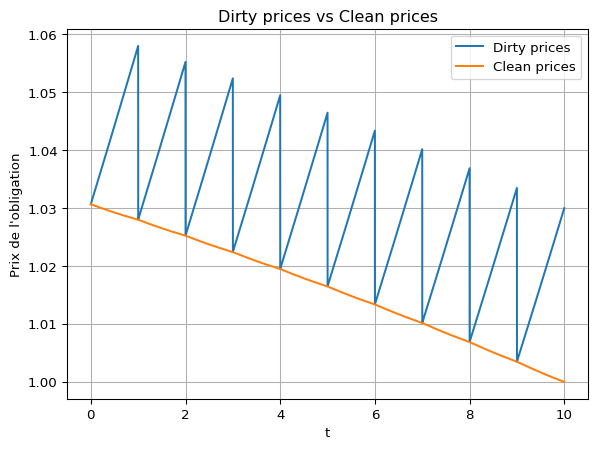

In [6]:
t=0
lambda_ = 1/100
r = 2/100
T = 10
c = 3/100
R = 40/100
N=1


dirty_prices = []
clean_prices = []
grid_values_c = np.arange(0,T+0.001,0.001)
for t in grid_values_c:
    dirty_prices.append(pricing_bond(t,c,T,r,lambda_,R,N))
    clean_prices.append(clean_price(t,c,T,r,lambda_,R,N))


import matplotlib.pyplot as plt
plt.plot(grid_values_c,dirty_prices, label="Dirty prices")
plt.plot(grid_values_c,clean_prices, label="Clean prices")
plt.title("Dirty prices vs Clean prices")
plt.xlabel("t")
plt.grid()
plt.legend()
plt.ylabel("Prix de l'obligation")

### a. Cas extrêmes

Nous avons analysé l’évolution du prix de l’obligation dans deux cas
extrêmes afin d’observer l’impact du coupon sur la dynamique des prix.
Toutes choses égales par ailleurs, nous avons modifié le coupon de
l’obligation tout en conservant les autres paramètres constants. Les
deux scénarios étudiés sont les suivants :  
- \$ c = 0.01 \$ : le coupon est inférieur au taux d’intérêt sans
risque.  
- \$ c = 0.05 \$ : le coupon est supérieur au taux d’intérêt sans
risque.

#### Cas 1 : \$ c = 0.01 \$

Lorsque \$ c = 1% \$ et que ce coupon est inférieur au taux d’intérêt
sans risque \$ r \$, la valeur de l’obligation évolue de manière
spécifique :

-   Au départ, l’obligation est escomptée car le coupon est faible, et
    les investisseurs anticipent un rendement global inférieur au taux
    du marché.  
-   À mesure que l’échéance approche, l’incertitude sur le paiement du
    coupon disparaît progressivement. Les investisseurs deviennent de
    plus en plus certains que le paiement aura bien lieu.  
-   À la veille du paiement, l’obligation converge vers un prix proche
    de \$ N + c \$ pour le dirty price (car elle inclut le coupon
    accumulé) et \$ N \$ pour le clean price (qui exclut le coupon
    accumulé).

Cela signifie que l’obligation s’apprécie au fil du temps en raison de
la certitude croissante du paiement des flux futurs. En d’autres termes,
plus l’échéance se rapproche, plus l’investisseur est assuré de recevoir
ses paiements, ce qui entraîne une augmentation progressive de la valeur
de l’obligation.

Text(0, 0.5, "Prix de l'obligation")

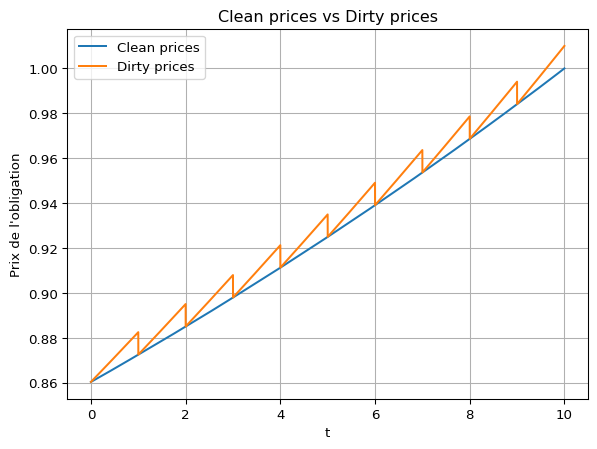

In [7]:
lambda_ = 1/100
r = 2/100
T = 10
c1 = 1/100
R = 40/100
N=1

clean_prices1 = []
dirty_prices1 = []
for t in grid_values_c:
    B_t_dirty = pricing_bond(t=t,c=c1,T=T,r=r,lambda_=lambda_,R=R,N=N)
    B_t_clean = clean_price(t=t,c=c1,T=T,r=r,lambda_=lambda_,R=R,N=N)
    clean_prices1.append(B_t_clean)
    dirty_prices1.append(B_t_dirty)

plt.plot(grid_values_c,clean_prices1, label="Clean prices")
plt.plot(grid_values_c,dirty_prices1, label="Dirty prices")
plt.title("Clean prices vs Dirty prices")
plt.legend()
plt.grid()
plt.xlabel("t")
plt.ylabel("Prix de l'obligation")

#### Cas 2 : \$ c = 0.05 \$

Lorsque \$ c = 5% \$ et que ce coupon est supérieur au taux d’intérêt
sans risque \$ r \$, la dynamique du prix de l’obligation suit une
évolution inverse :

-   Au départ, l’obligation est prisée au-dessus du nominal (elle se
    négocie avec une prime). Cela s’explique par le fait que son coupon
    généreux attire les investisseurs, qui considèrent que le rendement
    offert par l’obligation compense largement le risque de crédit et
    est plus attractif que les opportunités de placement à taux sans
    risque.  
-   À mesure que l’échéance approche, la valeur de l’obligation se
    deprécie progressivement. En effet, à chaque période, l’investisseur
    reçoit un coupon élevé, mais à l’échéance, il ne récupère que le
    nominal \$ N \$, ce qui entraîne une correction progressive du prix
    de marché.  
-   À la veille du remboursement, l’obligation converge vers \$ N + c \$
    pour le dirty price (qui inclut le dernier coupon à verser) et vers
    \$ N \$ pour le clean price.

Ainsi, cette obligation se déprécie progressivement jusqu’à l’échéance,
car l’effet attractif du coupon élevé s’amenuise à mesure que le
remboursement du capital nominal devient imminent. En d’autres termes,
l’obligation part d’une valeur supérieure à son nominal mais perd
progressivement sa prime à l’approche de l’échéance.

Text(0, 0.5, "Prix de l'obligation")

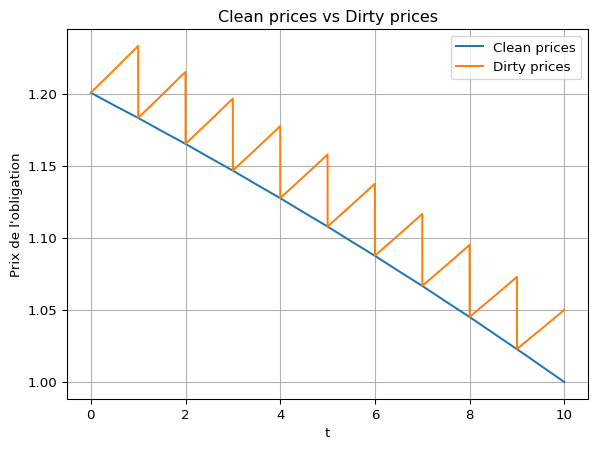

In [8]:
lambda_ = 1/100
r = 2/100
T = 10
c2 = 5/100
R = 40/100
N=1

clean_prices2 = []
dirty_prices2 = []
for t in grid_values_c:
    B_t_dirty = pricing_bond(t=t,c=c2,T=T,r=r,lambda_=lambda_,R=R,N=N)
    B_t_clean = clean_price(t=t,c=c2,T=T,r=r,lambda_=lambda_,R=R,N=N)
    clean_prices2.append(B_t_clean)
    dirty_prices2.append(B_t_dirty)

plt.plot(grid_values_c,clean_prices2, label="Clean prices")
plt.plot(grid_values_c,dirty_prices2, label="Dirty prices")
plt.title("Clean prices vs Dirty prices")
plt.legend()
plt.grid()
plt.xlabel("t")
plt.ylabel("Prix de l'obligation")

## III. Évolution du prix en fonction du taux d’intérêt

Le prix d’une obligation est une fonction décroissante du taux
d’intérêt. En effet, plus le taux d’intérêt est élevé, plus la valeur
actualisée des flux futurs (coupons et remboursement du nominal) est
faible, ce qui réduit mécaniquement le prix de l’obligation.

Dans cette analyse, il est inutile de distinguer le dirty price et le
clean price, car la différence entre les deux ne dépend pas du taux
d’intérêt. De plus, en considérant \$t = 0
$, il n'y a pas encore d’intérêts courus ($c = 0 \$), donc les deux prix
coïncident.

### Obligation au pair

Autour de \$c - = 2% \$, le prix de l’obligation est égal au nominal.
Cela s’explique par le fait que le taux de coupon est exactement égal au
taux de marché. L’obligation est alors dite “au pair”, car les
investisseurs n’ont ni prime ni décote à appliquer sur son prix.

### Explication de la relation négative entre prix et taux

La relation négative entre le prix d’une obligation et le taux d’intérêt
s’explique par l’effet de substitution avec les nouvelles émissions
obligataires.

-   Lorsque les taux d’intérêt augmentent, de nouvelles obligations sont
    émises avec des coupons plus attractifs.  
-   En conséquence, les obligations existantes, qui offrent un coupon
    fixe plus faible, deviennent moins intéressantes pour les
    investisseurs. Leur prix diminue afin d’ajuster leur rendement
    effectif au nouveau niveau des taux du marché.  
-   Inversement, si les taux d’intérêt baissent, les obligations
    existantes deviennent plus attractives puisqu’elles offrent un
    coupon plus élevé que les nouvelles émissions, ce qui entraîne une
    hausse de leur prix sur le marché secondaire.

Ainsi, la sensibilité d’une obligation aux variations de taux d’intérêt,
appelée “duration”, est un élément clé dans l’évaluation du risque de
taux et la gestion de portefeuille obligataire.

Text(0, 0.5, "Prix de l'obligation")

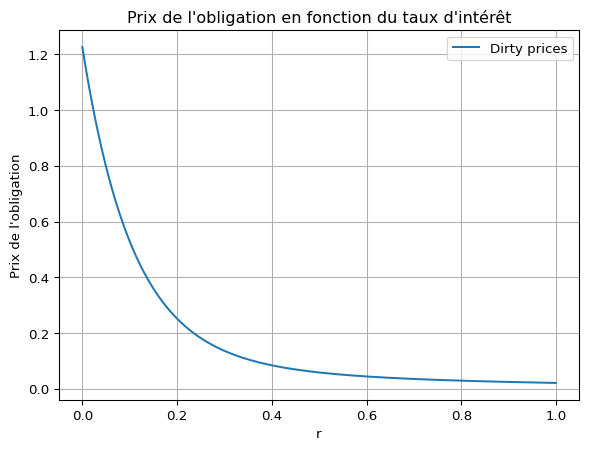

In [9]:
t=0
lambda_ = 1/100
T = 10
c =3/100
R = 40/100
N=1

dirty_prices = []
grid_values_r = np.arange(0,1,0.001) 
for r in grid_values_r:
    B_t_dirty = pricing_bond(t=t,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_r,dirty_prices, label="Dirty prices")
plt.title("Prix de l'obligation en fonction du taux d'intérêt")
plt.legend()
plt.grid()
plt.xlabel("r")
plt.ylabel("Prix de l'obligation")

## IV. Sensibilité du prix de l’obligation au taux d’intérêt / Duration

La duration est une mesure de la sensibilité du prix d’une obligation
aux variations du taux d’intérêt. Elle permet d’évaluer le risque de
taux, c’est-à-dire l’impact d’une variation des taux sur la valeur de
l’obligation.

> Dans le cas de l’évolution du prix en fonction du taux d’intérêt, la
> duration sera donc la pente de la courbe représentant cette relation.

Mathématiquement, la duration est définie comme la dérivée du prix de
l’obligation par rapport au taux d’intérêt :

$$
\delta = - \frac{d B_t}{d r} \times \frac{1}{B_t}
$$

En utilisant une approximation en différences finies, on exprime cette
dérivée de la manière suivante :

$$
\frac{d B_t}{d r}  \approx \frac{B_t(r+\Delta r) - B_t(r)}{\Delta r}
$$

Cette sensibilité permet de mesurer la variation du prix de l’obligation
en réponse à une fluctuation du taux d’intérêt, offrant ainsi une
évaluation directe du risque de taux auquel est exposé l’investisseur.
De ce fait, si les taux d’intérêt bouge de $\Delta r$ = 1%, alors les
prix bougeront de -sensibilité \* $\Delta r$ .

Nous allons implémenter ce calcul en Python, en prenant $\Delta r = 1$
bp (soit $0.0001$ en notation décimale).

In [10]:
def sensivity_to_rate(t,c,T,r,lambda_,R,N,dt=1,dr= 0.01/100):
    """
    Fonction qui calcule la sensibilité d'une obligation à un taux d'intérêt.
    """
    B_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    B_t_plus = pricing_bond(t,c,T,r+dr,lambda_,R,N,dt)
    sensivity = -((B_t_plus - B_t)/dr) * (1/B_t)
    return sensivity

Si les taux d’intérêt bouge de $\Delta r$ = 1%, alors les prix bougeront
de -sensibilité \* $\Delta r$ = -8,64 \* 1%. La duration va être souvent
proche de la maturité.

In [11]:
t=0
lambda_ = 1/100
T = 10
c =3/100
R = 40/100
r = 2/100
N=1

sensivity_to_rate(t,c,T,r,lambda_,R,N)

np.float64(8.643982489102903)

D’un point de vue graphique, il existe une certaine identité entre la
maturité et la duration, car cette dernière peut être interprétée comme
le barycentre des flux futurs de l’obligation. Plus ces flux sont
concentrés dans le temps, plus leur pondération affecte la sensibilité
du prix aux variations des taux d’intérêt.

#### Lien entre duration et maturité

-   La duration est une approximation de la durée d’exposition au
    risque, ajustée en fonction des flux de paiements.  
-   Elle est souvent proche de la maturité moyenne de l’obligation, bien
    que légèrement inférieure (environ 80% de la maturité totale, en
    fonction des conditions de marché et du niveau des coupons).

Ainsi, plus l’échéance de l’obligation se rapproche, plus la duration
tend à augmenter, car les flux futurs deviennent plus proches dans le
temps, rendant l’obligation plus sensible aux variations des taux
d’intérêt.

> Lorsque la maturité de l’obligation approche, sa sensibilité au taux
> d’intérêt tend à augmenter. En effet, la duration peut être
> interprétée comme une mesure du temps moyen pondéré pendant lequel
> l’investisseur est exposé au risque de taux.

Text(0, 0.5, 'Sensibilité')

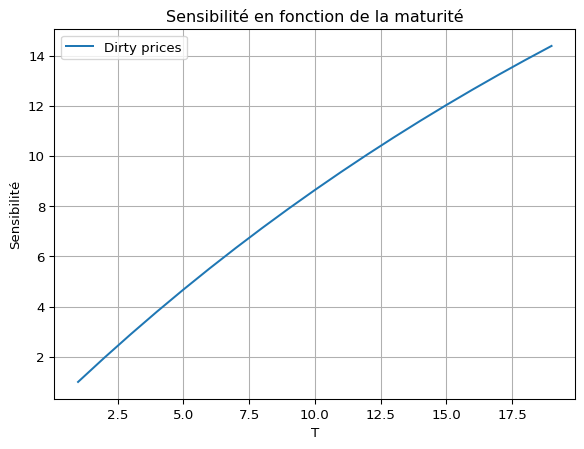

In [12]:
t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1

dirty_prices = []
grid_values_T = np.arange(1,20,1)
for T in grid_values_T:
    B_t_dirty = sensivity_to_rate(t,c,T,r,lambda_,R,N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_T,dirty_prices, label="Dirty prices")
plt.title("Sensibilité en fonction de la maturité")
plt.legend()
plt.grid()
plt.xlabel("T")
plt.ylabel("Sensibilité")

#### Cas particulier : absence de coupon, de taux d’intérêt et de risque de défaut

Lorsque le coupon, le taux d’intérêt et l’intensité de défaut sont nuls,
la duration est exactement égale à la maturité de l’obligation. Puisque
la duration peut être interprétée comme le barycentre des flux futurs de
l’obligation, lorsque le coupon et l’intensité de défaut sont nuls, tous
les flux sont concentrés à l’échéance, ce qui équivaut à la maturité de
l’obligation.

Text(0, 0.5, 'Sensibilité')

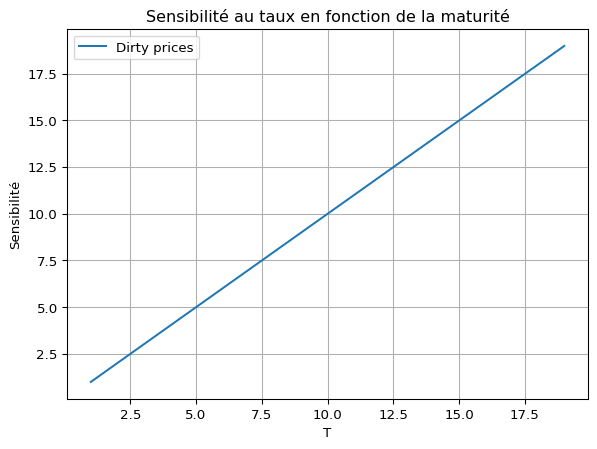

In [13]:
t=0
c = lambda_ = 10e-6
R = 40/100
N=1


dirty_prices = []
for T in grid_values_T:
    B_t_dirty = sensivity_to_rate(t,c,T,r,lambda_,R,N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_T,dirty_prices, label="Dirty prices")
plt.title("Sensibilité au taux en fonction de la maturité")
plt.legend()
plt.grid()
plt.xlabel("T")
plt.ylabel("Sensibilité")

> Dans le risque de taux, le principale indicateur est la duration.

## V. Modèlisation de la VaR

### V.1. Approche par la sensibilité

Selon le modèle de Hull et White, le taux d’intérêt est modélisé par :

$$
dr = \theta ( \mu - r) dt + \sigma dW
$$

où $\theta$ est le coefficient de vitesse de réversion, $\mu$ est le
taux d’intérêt moyen, $\sigma$ est la volatilité du taux d’intérêt et
$dW$ est un mouvement brownien. Ce modèle a la spécifité d’être normale.
De ce fait, $\Delta r \sim N(0, \sigma^2 \Delta t)$. En faisant
l’approximation de la variation du prix, il est possible d’approcher une
VaR par la sensibilité :

$$
\begin{aligned}
Duration &= - \frac{d B_t}{d r} \times \frac{1}{B_t} \\
\frac{d B_t}{B_t} &\approx - Duration \times  \Delta r \\
\end{aligned}
$$

In [14]:
# Objectif : écrire une fonction qui calcule la VaR avec l'approche par duration
from scipy.stats import norm

def sensitive_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h,dt=1,alpha=0.99) :
    """
    Calcul de la VaR gaussienne
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    Duration = sensivity_to_rate(t,c,T,r,lambda_,R,N,dt)

    return -(mu + Duration * sigma * np.sqrt(h) * norm.ppf(1 - alpha))

#--------------------------------------
# Paramètres du modèle de taux
#---------------------------------------

mu = 0
h = 1/12
sigma = 0.01

#--------------------------------------
# Paramètres de la valorisation du bond
#---------------------------------------

t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1
T=10

VaR = sensitive_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h=h,dt=1,alpha=0.99)
print(f"VaR estimé par l'approche par la sensibilité : {VaR:.4%}")

VaR estimé par l'approche par la sensibilité : 5.8049%

Pour cette estimation, nous avions supposé que la volatilité
$\sigma = 1\%$. Cependant, cette hypothèse pourrait s’écarter de la
réalité. Pour ce faire, nous allons extraire les données de taux
d’intérêt et calculer la volatilité empirique. L’ESTR est un taux un
jour collatéralisé,c’est donc quasiment sans risque. Nous allons donc
utiliser ce taux pour calculer la volatilité empirique. Pour cela, nous
allons utiliser l’historique des taux d’intérêt de l’ESTR sur une
période de 5 ans, i.e. 10/03/2025 - 12/03/2020, disponible sur ce lien :
y revenir.

Pour ce faire, nous utilisons la formule suivante :

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}
$$

Nous constatons que la volatilité empirique sur les 5 ans est de 25.45%.
Cette valeur est très élevée, ce qui signifie que les taux d’intérêt ont
connu des variations importantes sur cette période. Cela peut être du à
la trop grande période utilisée pour la calibration de la volatilité.
Pour ce faire, nous avons restreint la période à 1 an, i.e. 10/03/2025 -
10/03/2024. La volatilité empirique sur cette période est de 1.04%.
Cette valeur est plus cohérente avec les taux d’intérêt sans risque.

In [15]:
import pandas as pd
estr_df = pd.read_excel("estr.xlsx", skiprows=6)
#date as date
estr_df["Date"] = pd.to_datetime(estr_df["Date"], format="%Y-%m-%d")
estr_df = estr_df.set_index("Date")
estr_df = estr_df.sort_index()

estr_df.head()

In [16]:
vol_est = np.std(estr_df["PX_LAST"].pct_change())
print(f"Volatilité estimée sur 5 ans: {vol_est:.4f}")

# volatilité sur 1 an
vol_est= np.std(estr_df.loc["2024-03-10":"2025-03-10", "PX_LAST"].pct_change())
print(f"Volatilité estimée sur 1 an : {vol_est:.4f}")

Volatilité estimée sur 5 ans: 0.2545
Volatilité estimée sur 1 an : 0.0104

### V.2. Approche avec un repricing

Cette approche consiste à revaloriser, sous l’hypothèse de normalité des
taux, l’obligation à l’instant $t$ pour un taux $r + \Delta r$ et de
calculer la perte maximale possible. De ce fait, elle est plus précise
que l’approche par la sensibilité.

Puisque dans le cas d’une obligation, ce dont on veut se prémunir c’est
de la hausse des taux (puisqu’elle fait baisser le taux d’intérêt). De
ce fait, la VaR est donnée par :

$$
\text{VaR} =  - \frac{B_t(r + \Delta r) - B_t }{B_t},
$$

où $\Delta r$ est la variation des taux d’intérêt.

Par définition, la VaR estimée sera plus basse que l’autre approche en
raison de la convexité de l’évolution du prix de l’obligation en
fonction des taux d’intérêt. La Var par l’approche de la sensibilité,
quant à elle, suppose une linéarité de l’évolution du prix de
l’obligation en fonction des taux d’intérêt.

In [17]:
def repricing_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h,dt=1,alpha=0.99) :
    """
    Calcul de la VaR gaussienne
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    delta_r = mu + sigma * np.sqrt(h) * norm.ppf(alpha)
    P_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    P_t_shocked = pricing_bond(t,c,T,r+delta_r,lambda_,R,N,dt)

    VAR = -( (P_t_shocked - P_t)/P_t)

    return VAR, delta_r


#--------------------------------------
# Paramètres du modèle de taux
#---------------------------------------
mu = 0
h = 1/12
sigma = 0.01

#--------------------------------------
# Paramètres de la valorisation du bond
#---------------------------------------
t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1
T=10

VaR, delta_r = repricing_VaR(mu,sigma,t,c,T,r,lambda_,R,N,h=h,dt=1,alpha=0.99)

print(f"VaR estimé par l'approche par le réajustement : {VaR:.4%}")
print(f"Choc de taux : {delta_r:.2%}")

VaR estimé par l'approche par le réajustement : 5.6272%
Choc de taux : 0.67%

## VI. Focus risque de crédit & contrepartie

### VI.1. Comment estimer l’intensité de défaut ?

Précedemment, nous avons valoriser l’obligation de la manière suivante :

$$
\begin{aligned}
B_t &= C_t + N_t + R_t \\
&= N \left[ \sum_{i=1}^{n}  c \times e^{-(r + \lambda) \times (T_i
-t)} \mathbb{1}_{T_i \geq t} + e^{-(r+\lambda)(T-t)} \mathbb{1}_{T \geq t} +  \lambda R \times \frac{1 - e^{-(r+\lambda)(T-t)}}{r+\lambda} \mathbb{1}_{T \geq t} \right]
\end{aligned}
$$

et nous avons signfié la condition dans laquelle l’obligation émise vaut
100% du nominal, i.e. au pair, est $c \approx r + \lambda$. Cependant,
ce n’est pas exact.

Soit un coupon payé en continu, la valorisation de l’obligation est
donnée par :

$$
\begin{aligned}
B_t &= N \left[ \int_{t}^{T} c e^{-(r + \lambda) \times (u-t)} du + e^{-(r+\lambda)(T-t)} +  \lambda R \times \frac{1 - e^{-(r+\lambda)(T-t)}}{r+\lambda} \right]\\
&= N \left[ \frac{c}{r + \lambda} \left(1 - e^{-(r + \lambda)(T-t)} \right) + e^{-(r+\lambda)(T-t)} +  \lambda R \times \frac{1 - e^{-(r+\lambda)(T-t)}}{r+\lambda} \right]\\
B_t = N &\Leftrightarrow c = r + \lambda (1 - R) \\
& c - r = \lambda (1 - R) 
\end{aligned}
$$

De ce fait, en extrayant $c$, la condition dans laquelle l’obligation
émise vaut 100% du nominal, i.e. au pair, est \$c = r + (1 - R) \$.

> 💡 $s = c-r$ est la prime de crédit ou encore le spread de crédit.
> C’est la prime que l’investisseur demande pour le risque de crédit. Si
> $c > r$, l’obligation est émise à un prix supérieur à 100% du nominal.
> Si $c < r$, l’obligation est émise à un prix inférieur à 100% du
> nominal. Ce spread permet de faire la relation entre la PD exprimé par
> $\lambda$ et la LGD exprimé par $1 -R$. Cette information est plus
> facile à avoir que l’intensité de défaut car le spread est coté sur le
> marché à travers les CDS. Par définition, on en déduit facilement que
> plus cettre prime est élevé, plus l’emetteur est risqué.

Take away : Les notions de duration et de spread sont très importants
dans la modélisation du risque de taux

#### cas de l’argentine, pays risqué

Spread de crédit : 10.31%
Recouvrement : 40.00%
Intensité de défaut : 17.18%

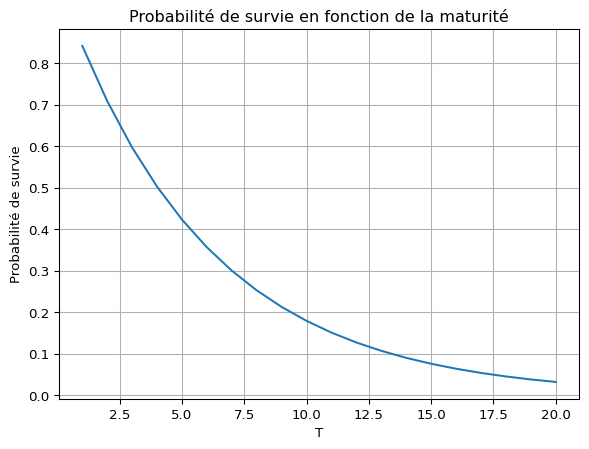

In [18]:
s = 1031/10000 
R = 0.4
lambda_ = s / (1 - R)
t=0

print(f"Spread de crédit : {s:.2%}")
print(f"Recouvrement : {R:.2%}")
print(f"Intensité de défaut : {lambda_:.2%}")
PS = [np.exp( - lambda_ * (T - t)) for T in range(1, 21)]

plt.plot(range(1,21),PS)
plt.title("Probabilité de survie en fonction de la maturité")
plt.xlabel("T")
plt.ylabel("Probabilité de survie")
plt.grid()

#### cas de la France

Spread de crédit : 0.32%
Recouvrement : 40.00%
Intensité de défaut : 0.54%

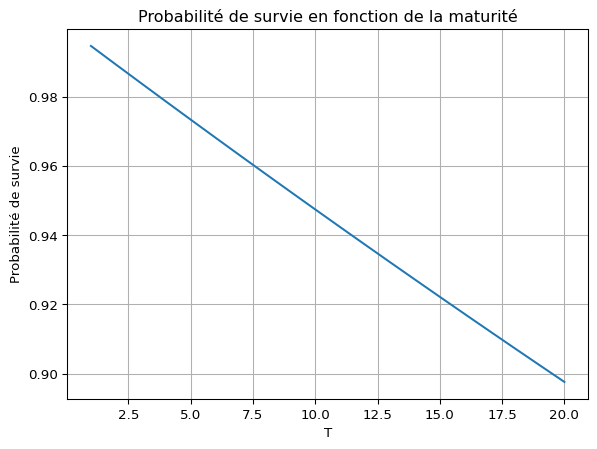

In [19]:
# Cas de la France
s = 32.4/10000 
R = 0.4
lambda_ = s / (1 - R)
t=0

print(f"Spread de crédit : {s:.2%}")
print(f"Recouvrement : {R:.2%}")
print(f"Intensité de défaut : {lambda_:.2%}")
PS = [np.exp( - lambda_ * (T - t)) for T in range(1, 21)]

plt.plot(range(1,21),PS)
plt.title("Probabilité de survie en fonction de la maturité")
plt.xlabel("T")
plt.ylabel("Probabilité de survie")
plt.grid()

En comparant les deux pays, l’Argentine et la France. On sait que
l’argentine est un pays plus risqué que la France. Cela se voit
également au niveau des spreads de crédit. En effet, le spread de
l’Argentine est plus élevé que celui de la France. Cela signifie que les
investisseurs demandent une prime de risque plus élevée pour investir
dans des obligations argentines que dans des obligations françaises. De
plus, en regardant la probabilité de survie des deux pays, on constate
que la probabilité de survie de l’Argentine est plus faible que celle de
la France. Cela signifie que les investisseurs considèrent que
l’Argentine est plus susceptible de faire défaut que la France.

### VI.2 Sensibilité crédit

In [20]:
def sensivity_to_credit(t,c,T,r,lambda_,R,N,dt=1,dlambda_= 0.01/100):
    """
    Fonction qui calcule la sensibilité d'une obligation à un taux d'intérêt.
    """
    B_t = pricing_bond(t,c,T,r,lambda_,R,N,dt)
    B_t_plus = pricing_bond(t,c,T,r,lambda_ + dlambda_,R,N,dt)
    
    sensivity = -((B_t_plus - B_t)/dlambda_) * (1/B_t) * (1/ (1-R))

    return sensivity

In [21]:
t=0
lambda_ = 1/100
T = 10
c =3/100
R = 40/100
r = 2/100
N=1

sensivity_to_credit(t,c,T,r,lambda_,R,N,dlambda_=0.01/100)

np.float64(8.821190868023761)

Text(0, 0.5, 'Sensibilité')

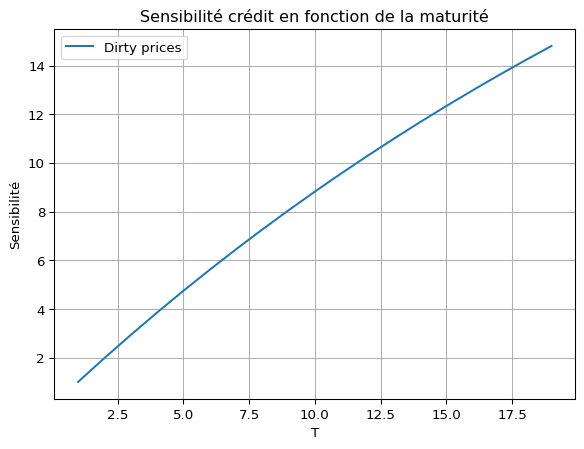

In [22]:
t=0
lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1

dirty_prices = []
grid_values_T = np.arange(1,20,1)
for T in grid_values_T:
    B_t_dirty = sensivity_to_credit(t,c,T,r,lambda_,R,N)
    dirty_prices.append(B_t_dirty)

plt.plot(grid_values_T,dirty_prices, label="Dirty prices")
plt.title("Sensibilité crédit en fonction de la maturité")
plt.legend()
plt.grid()
plt.xlabel("T")
plt.ylabel("Sensibilité")

Soit le modèle normale pour le taux :

$$
dr_t = \theta (\mu - r_t) dt + \sigma_r dW_t
$$

et un modèle log normale pour le spread de crédit, puisqu’il ne peut
être négatif : $$
\frac{ds_t}{s_t} = \sigma_s dZ_t
$$

Ces deux modèles sont liés par $dW_t dZ_t = \rho dt$. On peut exprimer
cette relation par $Z_t = \rho W_t + \sqrt{1 - \rho^2} V_t$, où $V_t$
est un mouvement brownien standard indépendant de $W_t$. Cette
corrélation est positive. \> 💡 si les taux d’intérêt montent, le risque
de crédit augmente puisque les entreprises ont plus de mal à rembourser
leur dette. De ce fait, le spread de crédit augmente.

Supposons qu’on cherche à calculer une VaR d’horizon $h$. Pour cela, il
faudra faire des simulations de Monte Carlo pour les deux modèles.

$$
\begin{aligned}
r_{t+h} &= r_t + \theta (\mu - r_t) h + \sigma_r \sqrt{h} W_t \\
s_{t+h} &= s_t \exp(\sigma_s \sqrt{h} Z_t) \\
ou \quad s_{t+h} &= s_t (1 + \sigma_s \sqrt{h} Z_t) \quad (\text{par DL})
\end{aligned}
$$

Posons les paramètres suivants : - $\theta = 0.1$ : le coefficient de
vitesse de réversion - $\mu = 0.02$ : le taux d’intérêt moyen -
$\sigma_r = 0.01$ : la volatilité du taux d’intérêt - $\sigma_s = 0.4$ :
la volatilité du spread de crédit - $\rho = 0.4$ : la corrélation entre
les deux mouvements browniens - $r = 0.02$ : le taux d’intérêt initial -
$h = 1/12$ : l’horizon de calcul de la VaR - $c = 3\%$ : le coupon
annuel - $R = 40\%$ : le taux de recouvrement - $N = 1$ : le nominal de
l’obligation - $T = 10$ : l’échéance de l’obligation

In [23]:
import numpy as np

def MC_VaR(c,T,r,lambda_,R,N,h,sigma_r, sigma_s, rho, alpha=0.99, N_MC=1000,dt=1):
    # print("Parameters")
    # print(f"coupon : {c:.2%}")
    # print(f"maturity : {T} years")
    # print(f"risk free rate : {r:.2%}")
    # print(f"credit spread : {lambda_:.2%}")
    # print(f"recovery rate : {R:.2%}")
    # print(f"nominal : {N}")

    prices = []
    
    P_0 = pricing_bond(t=0,c=c,T=T,r=r,lambda_=lambda_,R=R,N=N,dt=dt)
    # print(f"P0 : {P_0}")

    s_0 = lambda_ * (1 - R)
    r_0 = r

    for t in range(N_MC):
        # Generate correlated Brownian motions
        W1 = np.random.normal()
        W2 = rho * W1 + np.sqrt(1 - rho) * np.random.normal()

        # Euler discretization 
        r_h = r_0 + sigma_r * np.sqrt(h) * W1
        s_h = s_0 * ( 1 + sigma_s * np.sqrt(h) * W2)
        lambda_h = s_h / (1 - R)
        # print("="*30)
        # print("Parameters")
        # print(f"coupon : {c:.2%}")
        # print(f"maturity : {T} years")
        # print(f"risk free rate : {r_h:.2%}")
        # print(f"credit spread : {lambda_h:.2%}")
        # print(f"recovery rate : {R:.2%}")
        # print(f"nominal : {N}")

        P_h = pricing_bond(t=h,c=c,T=T,r=r_h,lambda_ = lambda_h,R=R,N=N,dt=dt)
        # print(f"Price : {P_h}")
        variation = (P_h - P_0)/P_0
        prices.append(variation)


    VaR = np.quantile(prices, 1 - alpha)

    return VaR

sigma_r = 0.01
sigma_s = 0.4
rho = 0.40

lambda_ = 1/100
r = 2/100
c =3/100
R = 40/100
N=1
h = 1/12
T= 10

VaR_monte_carlo = MC_VaR(c,T,r,lambda_,R,N,h,sigma_r, sigma_s, rho, alpha=0.99, N_MC=1000,dt=1)
print(f"VaR estimé par Monte Carlo : {VaR_monte_carlo:.4%}")

VaR estimé par Monte Carlo : -5.7782%

Lorsque \$ \$ (le coefficient de corrélation entre les taux d’intérêt et
le spread de crédit) est positif, une hausse des taux d’intérêt entraîne
également une hausse du spread de crédit. Cette dynamique amplifie le
risque global, car les pertes dues à la hausse des taux s’ajoutent aux
pertes induites par l’élargissement du spread de crédit. Ainsi, la Value
at Risk (VaR) est plus élevée, reflétant l’accumulation des risques liés
aux deux facteurs.

En revanche, lorsque \$ \$ est négatif, une hausse des taux d’intérêt
tend à réduire le spread de crédit, et inversement. Il se crée alors un
effet de compensation : les pertes générées par l’évolution des taux
sont partiellement absorbées par les gains résultant de la contraction
du spread (ou inversement). C’est le principe de diversification. Dans
ce cas, la VaR est plus faible, car les effets du taux d’intérêt et du
spread de crédit s’annulent en partie, réduisant ainsi l’ampleur des
pertes potentielles.

  0%|          | 0/100 [00:00<?, ?it/s] 10%|█         | 10/100 [00:00<00:00, 90.55it/s] 20%|██        | 20/100 [00:00<00:00, 90.66it/s] 30%|███       | 30/100 [00:00<00:00, 91.29it/s] 40%|████      | 40/100 [00:00<00:00, 91.19it/s] 50%|█████     | 50/100 [00:00<00:00, 91.60it/s] 60%|██████    | 60/100 [00:00<00:00, 91.91it/s] 70%|███████   | 70/100 [00:00<00:00, 92.03it/s] 80%|████████  | 80/100 [00:00<00:00, 91.73it/s] 90%|█████████ | 90/100 [00:00<00:00, 91.77it/s]100%|██████████| 100/100 [00:01<00:00, 92.01it/s]100%|██████████| 100/100 [00:01<00:00, 91.67it/s]

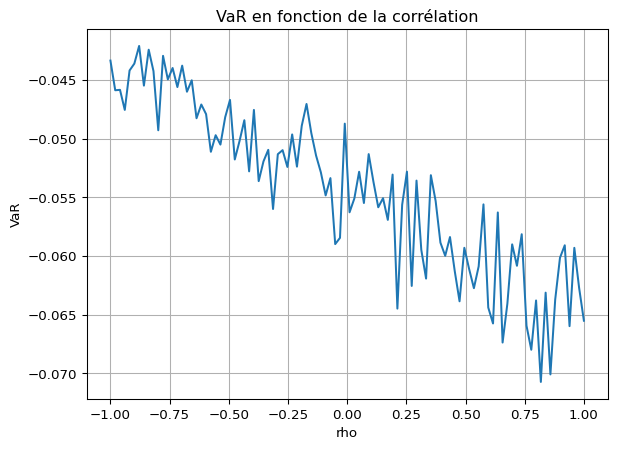

In [24]:
# VaR en fonction de rho
from tqdm import tqdm 

rhos = np.linspace(-1,1,100)
VaRs = [MC_VaR(c,T,r,lambda_,R,N,h,sigma_r, sigma_s, rho, alpha=0.99, N_MC=1000,dt=1) for rho in tqdm(rhos)]

plt.plot(rhos,VaRs)
plt.title("VaR en fonction de la corrélation")
plt.xlabel("rho")
plt.ylabel("VaR")
plt.grid()

#### Estimation de la volatilité du spread de crédit

Pour la volatilité du spread, nous avons supposé que $\sigma_s = 40\%$.
Nous allons maintenant estimer cette volatilité à partir des données de
marché, en utilisant l’historique des spreads de crédit sur une période
de 5 ans, i.e. 11/03/2025 - 11/03/2020, disponible sur ce lien : y
revenir.

La volatilité du spread est une volatilité annualisée. De ce fait, la
formulation de la volatilité empirique, lorsque la fréquence est
quotidienne, est la suivante :

$$
\sigma_s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (s_i - \bar{s})^2} \times \sqrt{255}
$$

In [25]:
cds_df = pd.read_excel("cds.xlsx", skiprows=6)
#date as date
cds_df["Date"] = pd.to_datetime(cds_df["Date"], format="%Y-%m-%d")
cds_df = cds_df.set_index("Date")
cds_df = cds_df.sort_index()

cds_df.head()

In [26]:
vol_est = np.std(cds_df["PX_LAST"].pct_change())
print(f"Volatilité estimée sur 5 ans: {vol_est*np.sqrt(255):.4f}")

# volatilité sur 1 an
vol_est= np.std(cds_df.loc["2024-03-11":"2025-03-11", "PX_LAST"].pct_change())
print(f"Volatilité estimée sur 1 an : {vol_est*np.sqrt(255):.4f}")

Volatilité estimée sur 5 ans: 0.4512
Volatilité estimée sur 1 an : 0.5181

# Risque de modèle et risque climatique

En dehors du risque de crédit et du risque de marché, il existe d’autres
types de risques qui peuvent affecter les institutions financières et
les marchés. Deux d’entre eux sont le risque de modèle et le risque
climatique.

## Risque de modèle

Le risque de modèle est le risque associé à une mauvaise utilisation
d’un modèle dans le processus de prise de décision. Il peut être causé
par : - une incertitude sur les paramètres, - une qualité insuffisante
des données, - ou une inadéquation structurelle du modèle par rapport à
la réalité observée.

Ce risque peut conduire à des erreurs de prévision, à des décisions
inappropriées ou à des pertes financières. Il est donc essentiel de bien
comprendre les hypothèses et limites des modèles employés.

C’est une activité où l’intervention humaine reste indispensable : il
est nécessaire de procéder à des *sanity checks*, du *backtesting*, et
de challenger les modèles à l’aide de versions plus simples
(*dégénérées*) ou plus riches, afin d’en comparer les résultats et de
mieux cerner leurs faiblesses.

Pour réduire le risque de modèle, il est courant de mettre en place une
fonction indépendante de validation, généralement assurée par les
équipes MRM (Model Risk Management). Ces dernières sont chargées : -
d’auditer les modèles, - de mener des tests de robustesse, - et de
recommander des provisions en cas de risque de surévaluation des actifs.

Les compétences clés pour cette activité incluent : - les mathématiques
financières, - la connaissance des marchés financiers et des modèles de
risque, - la programmation et l’utilisation d’outils quantitatifs, -
ainsi que des aptitudes à la communication, au travail en équipe et au
raisonnement critique.

## Risque climatique

Le risque climatique désigne les impacts potentiels des changements
climatiques et des politiques environnementales sur les entreprises et
les marchés financiers. Contrairement aux risques classiques, les
trajectoires de référence sont définies par des organismes scientifiques
comme le GIEC, ce qui limite l’appropriation directe des modèles par les
institutions financières. Il s’agit donc d’un domaine où le risque de
modèle est indirect.

Le réseau NGFS (Network for Greening the Financial System) a été mis en
place pour aider les régulateurs et les banques centrales à mieux
intégrer les risques climatiques dans leurs cadres prudentiels.

À l’heure actuelle, il n’existe pas de consensus clair sur la manière
d’intégrer pleinement le risque climatique dans les modèles financiers ;
il s’agit plutôt de tentatives progressives d’adaptation. Le NGFS
propose plusieurs scénarios climatiques, parmi lesquels :

-   Current Policies : continuité des politiques actuelles sans nouvel
    engagement.
-   NDC (Nationally Determined Contributions) : politiques actuelles +
    engagements annoncés par les États.
-   Disorderly Transition (1.5°C) : les engagements sont mis en œuvre
    avec retard ou de façon désorganisée.
-   Net Zero / 2°C : scénario optimisé pour limiter le réchauffement à
    2°C — le cadre le plus ambitieux et le plus stable.

On distingue généralement deux types de risques climatiques :

### 1. Risque physique

Ce risque est lié aux conséquences directes des changements climatiques
sur les infrastructures et l’environnement : - Risques aigus :
événements extrêmes (inondations, sécheresses, tempêtes, etc.). -
Risques chroniques : évolutions lentes (élévation du niveau des mers,
hausse des températures, etc.).

Ces risques peuvent entraîner : - des pertes matérielles, - des
interruptions d’activité, - des coûts de réparation et d’adaptation.

### 2. Risque de transition

Ce risque est associé aux mesures prises pour réduire les émissions de
gaz à effet de serre et passer à une économie bas carbone. Il peut
provoquer : - des pertes de valeur sur certains actifs, - des coûts de
transition élevés, - des bouleversements sectoriels et technologiques.

Il comprend deux composantes : - le risque politique (durcissement
réglementaire, interdictions, fiscalité verte, etc.), - et le
risque/opportunité technologique (émergence de nouvelles technologies,
changement dans les préférences de consommation, etc.).

On peut formuler ce risque comme une relation :

$$
\text{Risque de transition} = \text{Risque politique} - \text{Opportunités technologiques}
$$

Ainsi, une entreprise bien positionnée sur les technologies vertes peut
compenser tout ou partie du risque politique subi.

-   Le risque physique est plus élevé dans les scénarios Current
    Policies, NDC, et Disorderly Transition, car ils impliquent une
    action climatique insuffisante ou retardée.
-   À l’inverse, le risque de transition est plus important dans les
    scénarios ambitieux comme Net Zero, où les ajustements politiques et
    économiques sont rapides et profonds.